# Project: EDA analysis of No-show appointments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The No-show appointments dataset contains one target variable, the paitents show up for their appoiments or not (No means they have attended their appoiments, Yes means they didn't), and 13 independent variables, include the ID of the patient and the appointment, the patient's personal information (like age, gender, whether they enrolled in medical aid plan etc.), the patient's medical history (whether they have hipertension, diabete etc.).

The purpose of this project is to analyze the data, and answer some questions based on the descriptive statistics result of the dataset. First, how many patients didn't show up for their appointmenrs? Second, how many days typical the patients scheduled their appoinments? Third, which neighbourhoods (list top 5 neighbourhoods) has more appointments than other distrits? Fourth, is sending SMS messages help the patient show up for their appoitments? 

In [151]:
# load necessary packages

import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [152]:
# load the data
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [153]:
# print few lines of data to get a galance of the dtaa
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [154]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [155]:
# inspect the data sets
df.shape

(110527, 14)

In [156]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

There are 110,527 rows, and 14 columns in the dataset. We could see that the patientId and appointmentID should be the string format, instead of the numeric format; the scheduledday, and appointmentday should be in datetime format instead of object; the categorical variables (Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received) should be object instead of numerical variables here.

We will drop all the variables we don't need for this project, like PatientId, AppointmentID, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap here; we will have a new calculate column called 'day_diff', to hold the days between the scheduledday and appointmentday, and drop scheduledday, appointmentday variables later. 

In [157]:
# check if the dataset has any NA
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [158]:
# check if the dataset has any missing value
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [159]:
# check if there is any mistake in the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The minimum age in the dataset is -1, which is not making sence. We will clean up the dataset in the next step. Otherwise, there are no missing value or mistaken data in the dataset.

### Data cleaning and reshaping

In [160]:
# check how many obervations have age less then 0
df[df.Age<0].sum()

PatientId                  4.65943e+14
AppointmentID                  5775010
Gender                               F
ScheduledDay      2016-06-06T08:58:13Z
AppointmentDay    2016-06-06T00:00:00Z
Age                                 -1
Neighbourhood                    ROMÃO
Scholarship                          0
Hipertension                         0
Diabetes                             0
Alcoholism                           0
Handcap                              0
SMS_received                         0
No-show                             No
dtype: object

There is one observation has age as -1. We will drop this observation.

In [161]:
# drop the non-sence observation
df=df[df.AppointmentID!=5775010]

In [162]:
# check the dataset again to make sure the observation has been dropped
df.shape

(110526, 14)

In [163]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There are 110,526 rows, and 14 columns in the dataset now. And there isn't any non-sence data now.

In [164]:
# we will add one new column called day_diff here to calculate the date difference between the date of the schedule day and
# the date of appointment, to know how many days ahead of the appointments when people call to schedule the appointment 
df=df.assign(day_diff=abs(pd.to_datetime(df['ScheduledDay']).dt.date-pd.to_datetime(df['AppointmentDay']).dt.date).dt.days)

In [165]:
# drop un-needed columns

df=df.drop(['PatientId','AppointmentID','Hipertension','Diabetes','Alcoholism','Handcap','ScheduledDay','AppointmentDay'],axis=1)

In [166]:
# check the data
df.head()

,Gender,Age,Neighbourhood,Scholarship,SMS_received,No-show,day_diff
0,F,62,JARDIM DA PENHA,0,0,No,0
1,M,56,JARDIM DA PENHA,0,0,No,0
2,F,62,MATA DA PRAIA,0,0,No,0
3,F,8,PONTAL DE CAMBURI,0,0,No,0
4,F,56,JARDIM DA PENHA,0,0,No,0


Now the dataset is reday for the exploratory data analysis.

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: How many patients didn't show up for their appointmenrs?

In [167]:
# show how many patients didn't show up for the appointments
df.groupby(df['No-show']).size()

No-show
No     88207
Yes    22319
dtype: int64

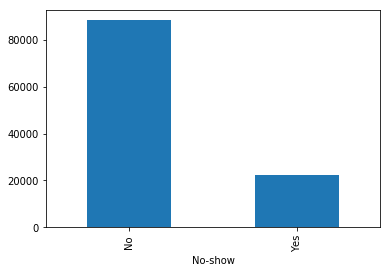

In [168]:
pd.crosstab(df['No-show'],df['No-show'].size).plot.bar(legend=0)

Over the 110,526 patients, there are 88,207 (79.8%) patients show up for their appointments, 22319 (20.2%) patients didn't show up for their appointments. The no-show rate is pretty high.

### Research Question 2: How many days typical the patients scheduled their appoinments?

In [169]:
# show the descriptive statistics result for day-diff
df['day_diff'].describe()

count    110526.000000
mean         10.183975
std          15.254914
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: day_diff, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E2C7902A58>]],
      dtype=object)

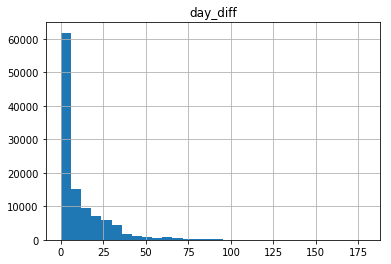

In [170]:
df.hist(['day_diff'],bins=30)

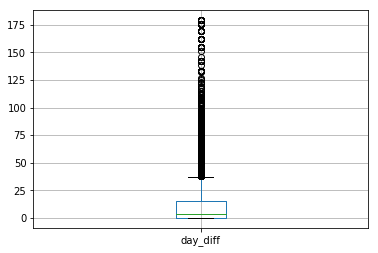

In [171]:
df.boxplot(['day_diff'])

We could see that the patients made their appointments in average 10 days ago, with minimun 0 days, and maximum 179 days. The distribution of the day_diff is right skewd, with lots of data points outside the IQR method range, but these data points are not neccearily the outliers, it only shown that some patients have to make appoitnments ealier, and wait for long time period for their appointments. 

### Research Question 3: Which neighbourhoods (list top 5 neighbourhoods) has more appointments than other districts?

In [172]:
# group by the districts by their numbers, and list the top 5 neighbouthoods
groups=df.groupby(df['Neighbourhood']).size()
groups.sort_values(ascending=False).head(5)

Neighbourhood
JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
dtype: int64

We could see that, JARDIM CAMBURI, MARIA ORTIZ, RESISTÊNCIA, JARDIM DA PENHA, and ITARARÉ have more appointments than other districts. We could better arrange the medical resources based on the result.

### Research Question 4: Is sending SMS messages help the patient show up for their appoitments?

In [173]:
df.groupby(df.SMS_received).size()

SMS_received
0    75044
1    35482
dtype: int64

In [174]:
df.groupby(['SMS_received','No-show']).size()

SMS_received  No-show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
dtype: int64

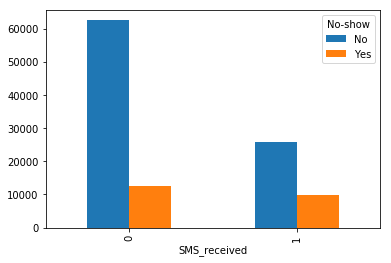

In [175]:
pd.crosstab(df['SMS_received'],df['No-show']).plot.bar()

Among the 35,482 patients who have received the SMS message, 9784 (27.57%) didn't show up, while amont the 75,044 patients who didn't received the SMS message, 12,535 (16.7%) didn't show up. So sending SMS message is not necessarily help the patients show up for their appointments.

<a id='conclusions'></a>
## Conclusions

Based on the analysis done above, we could see that there are 20.2% patients didn't show up for their appointments, it is a high rate, we could try to implement the machine learning skills to try to predict whether the patient would show up for thier appointments to help to reduce the no-show rate, to help to reduce the waste of the medical resources. 

We could also see that which neighbourhoods have more medical appointments than other districts, so we might help to better arrange the medical resources. Sent the SMS messages didn't necessarily help the patients to show up for their appointments, we could think about other ways to try to help the patients to show up.